# Metropolis-Hastings

We work with the unnormalized target distribution:
$$p\left(x\right)=N\left(x\mid-4,\left(\frac{1}{2}\right)^2\right)+N\left(x\mid4,1\right)$$

With the proposal distribution:
$$q\left(x,\ x_0\right)=N\left(x\mid x_0,\epsilon^2\right)$$

In [53]:
import numpy as np
import random as rn
import scipy.stats as sts
from scipy import signal
import matplotlib.pyplot as plt

def target_pdf(x):
    return (sts.norm(-4, 0.5).pdf(x) + sts.norm(4, 1).pdf(x))

def metropolis(dist, eps, size):
    
    samples, accepted = np.zeros(size), np.zeros(size)
    curr_sample = sts.norm(0, 2).rvs()
    
    for i in range(size):
        draw = sts.norm.rvs(curr_sample, eps)
        prob = dist(draw) / dist(curr_sample)
        
        if prob >= 1 or rn.random() < prob:
            curr_sample = draw
            accepted[i] = 1
        
        samples[i] = curr_sample
    return (samples, accepted)

In [54]:
def plot_metropolis(epsilon, iterations):
    samples, accepted = metropolis(target_pdf, epsilon, iterations)
    print('Num of iterations : ', iterations,
          '\nAcceptance rate :', np.mean(accepted),
          '\nValue of Epsilon:', epsilon)

    x = np.linspace(-10, 10, 200)
    plt.figure(figsize=(10, 6))
    plt.plot(x, target_pdf(x), color='black')
    plt.plot(samples, sts.uniform.rvs(loc=-0.04, scale=0.03, size=1000), 
            'gx', markersize = 0.8, alpha=0.3)
    
    plt.plot(samples, np.linspace(0, 1, 1000), alpha=0.3, color='blue')
    plt.title('Metropolis-Hastings algorithm')
    plt.ylim([-0.1, 1])
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.acorr(samples, maxlags=20, detrend=lambda \
          samples: signal.detrend(samples, type='constant'))
    plt.title('Autocorrelation')
    plt.show()

Num of iterations :  1000 
Acceptance rate : 0.839 
Value of Epsilon: 0.5


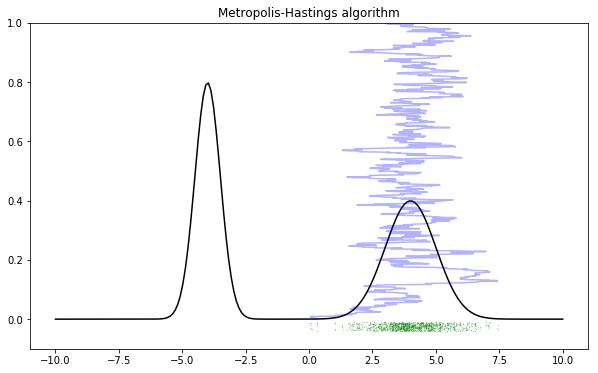

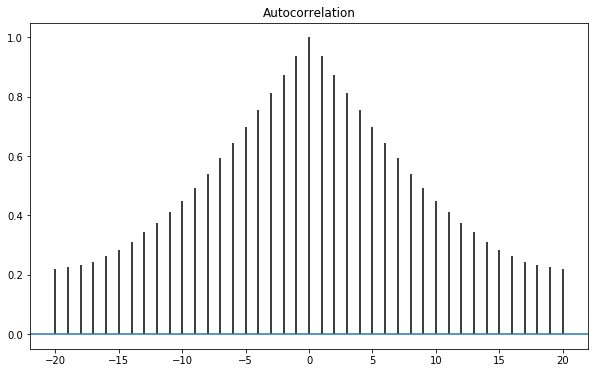

In [55]:
plot_metropolis(0.5, 1000)

Num of iterations :  1000 
Acceptance rate : 0.507 
Value of Epsilon: 1


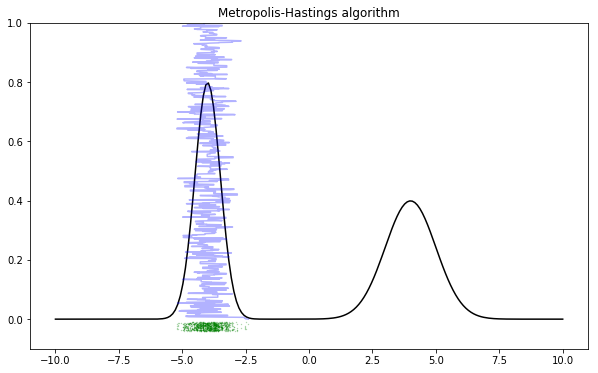

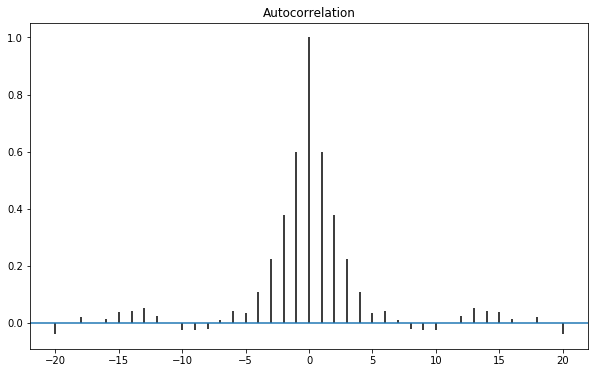

In [56]:
plot_metropolis(1, 1000)

Num of iterations :  1000 
Acceptance rate : 0.386 
Value of Epsilon: 2


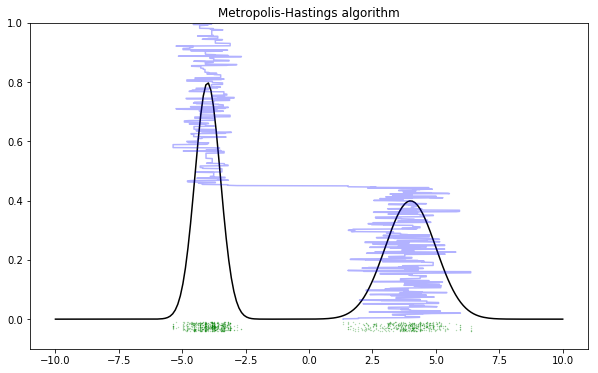

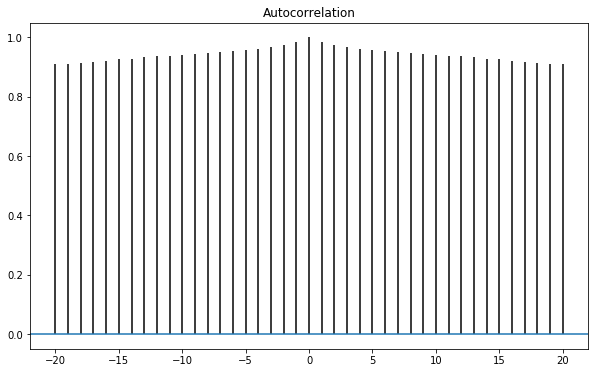

In [57]:
plot_metropolis(2, 1000)

Num of iterations :  1000 
Acceptance rate : 0.249 
Value of Epsilon: 4


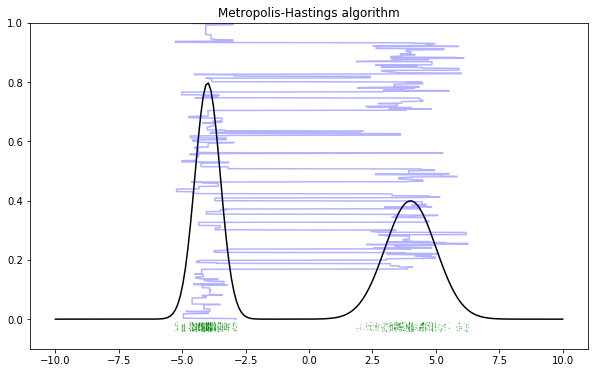

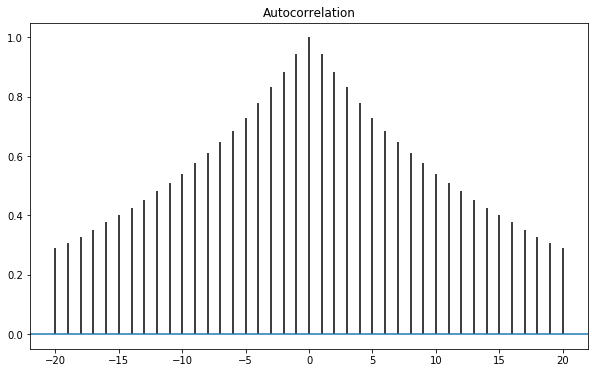

In [58]:
plot_metropolis(4, 1000)